# University of Strathclyde -  MSc Artificial Intelligence and Applications
# CS814 - Artificial Intelligence for Autonomous Systems
# Python Exercise 1 - Collatz Function
 File Created first created 24th September 2019 by Barry Smart.

## Part 1
 This part walks through the examples set out in the XXX.pdf.

In [11]:
# Import numpy and pandas - we'll use them later on to visualise the results.
import numpy as np
import pandas as pd


### Create core function
 Create a function that, given a positive integer n, will return the length of the reslt Collatz sequence.

In [12]:
def calculate_length_of_collatz_sequence (n):
    #TODO : check n is a positive integer?
    sequence_length = 1
    # The assumption is that the sequence will ultimately return to one (unproven)
    #TODO : put some upper limit on the number of iterations the while limit can perform to stop an inifite loop?
    while (n != 1):
        # If n is even...
        if (n % 2 == 0):
            # ... we divide it by 2 
            n = n // 2
        # Otherwise...
        else:
            # ... we multiply it by 3 and add 1
            n = (3 * n) + 1
        # During each successful transition of the while loop, increent the sequence length by 1
        sequence_length = sequence_length + 1
    return sequence_length


### Create function to iterate and find maximum
 Create a function that steps through positive integers in a definted range and computes the Collatz sequence lenth for each.

 It then returns the maximum Collatz sequence length found, the "seed" that generated that sequence and a list containing all of the pairs to enable visualisation of the result.

In [13]:
def find_biggest_sequence(starting_integer, ending_integer):
    #TODO check that starting_integer is lower than ending_integer, and both are integers
    # Prime the counters
    largest_sequence_length = 1
    largest_sequence_seed = 1
    result_list = []
    # Step through each of the integers from start to end
    for seed in range(starting_integer, ending_integer + 1):
        # Calculate the length of the Collatz sequence
        length_of_sequence = calculate_length_of_collatz_sequence(seed)
        # If thus is the longest sequence we've seen so far, store it away
        if (length_of_sequence > largest_sequence_length):
            largest_sequence_length = length_of_sequence
            largest_sequence_seed = seed
        result_list.append([seed, length_of_sequence])
    return largest_sequence_seed, largest_sequence_length, result_list


In [14]:
#### Find largest Collatz sequence between 1 and 100,000
# Call the function to discover the largest sequence length between 1 and 100,000.    
start = 1
end = 100000
seed, length, results = find_biggest_sequence(start, end)
print("The largest Collatz sequence between", start, "and", end, "is", length, "and is generated by", seed, ".")


The largest Collatz sequence between 1 and 100000 is 351 and is generated by 77031 .


## Part 2
 Further exploratation of how the Collatz sequence behaves.

### Function to plot Collatz sequence length over range
 Create a function that will visualise how the Collatz sequence develops as we step through the sequence.

In [15]:
def plot_collatz(data_frame, max_size):
    # Random sample the results to get something that is more manageable to plot?
    if len(data_frame) > max_size:
        data_frame = data_frame.sample(n=max_size)
    data_frame.plot.scatter(x='seed', y='sequence_length', alpha = 0.2)



### Exploratory Data Analysis
 Turn the results into a dataframe and set column titles.

 Then Check the data frame that has been created is as expected.

In [16]:
df = pd.DataFrame(results, columns = ['seed' , 'sequence_length'])
df.head(10)


,seed,sequence_length
0,1,1
1,2,2
2,3,8
3,4,3
4,5,6
5,6,9
6,7,17
7,8,4
8,9,20
9,10,7


 Run basic statistics on the "sequence_length"

In [17]:
df['sequence_length'].describe()


count    100000.000000
mean        108.538400
std          51.365918
min           1.000000
25%          66.000000
50%         100.000000
75%         147.000000
max         351.000000
Name: sequence_length, dtype: float64

 Visualise the results.  Note - this plot randomly samples 1,000 of the 100,000 data points as the data set is otherwise too slow to plot.

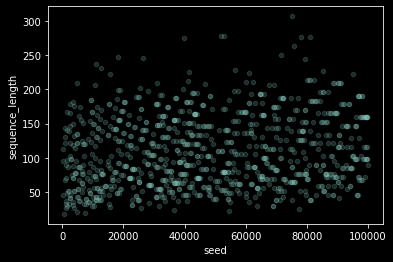

In [18]:
plot_collatz(df, 1000)


 Now repeat the process to examine how Collatz behave in the region where the maximum result is returned.

 So generating a new data frame that only includes 1000 data points spanning the point where the maximum occures, and then plotting that.

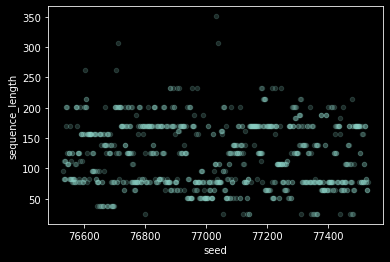

In [19]:
start = seed - 500
end = seed + 500
seed, length, results = find_biggest_sequence(start, end)
df = pd.DataFrame(results, columns = ['seed' , 'sequence_length'])
plot_collatz(df, 1000)

